In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

data = pd.read_csv('../data/data_cleaned.csv')

In [66]:
data.head()

,rank,video,video_views,likes,dislikes,category,published,like_ratio
0,1,Lil Nas X - Old Town Road (Official Movie) ft....,54071677,3497955,78799,Music,2019,6.47
1,2,"20 Tennis shots if they were not filmed, NOBOD...",3471237,19023,859,NaN,2017,0.55
2,3,JoJo Siwa - Karma (Official Video),34206747,293563,0,Music,2024,0.86
3,4,David Kushner - Daylight (Official Music Video),18558390,680732,0,Music,2023,3.67
4,5,Wiz Khalifa - See You Again ft. Charlie Puth [...,6547981039,44428537,0,Music,2015,0.68


In [67]:
with open('variables.pkl', 'rb') as f:
    variables = pickle.load(f)

data_sorted_by_views = variables['data_sorted_by_views']
data_sorted_by_likes = variables['data_sorted_by_likes']
views_by_category_sorted = variables['views_by_category_sorted']
years_by_views_sorted = variables['years_by_views_sorted']
correlation = variables['correlation']

<h1>Visualisation des Données</h1>

<strong>Histogramme de la distribution des vues</strong>

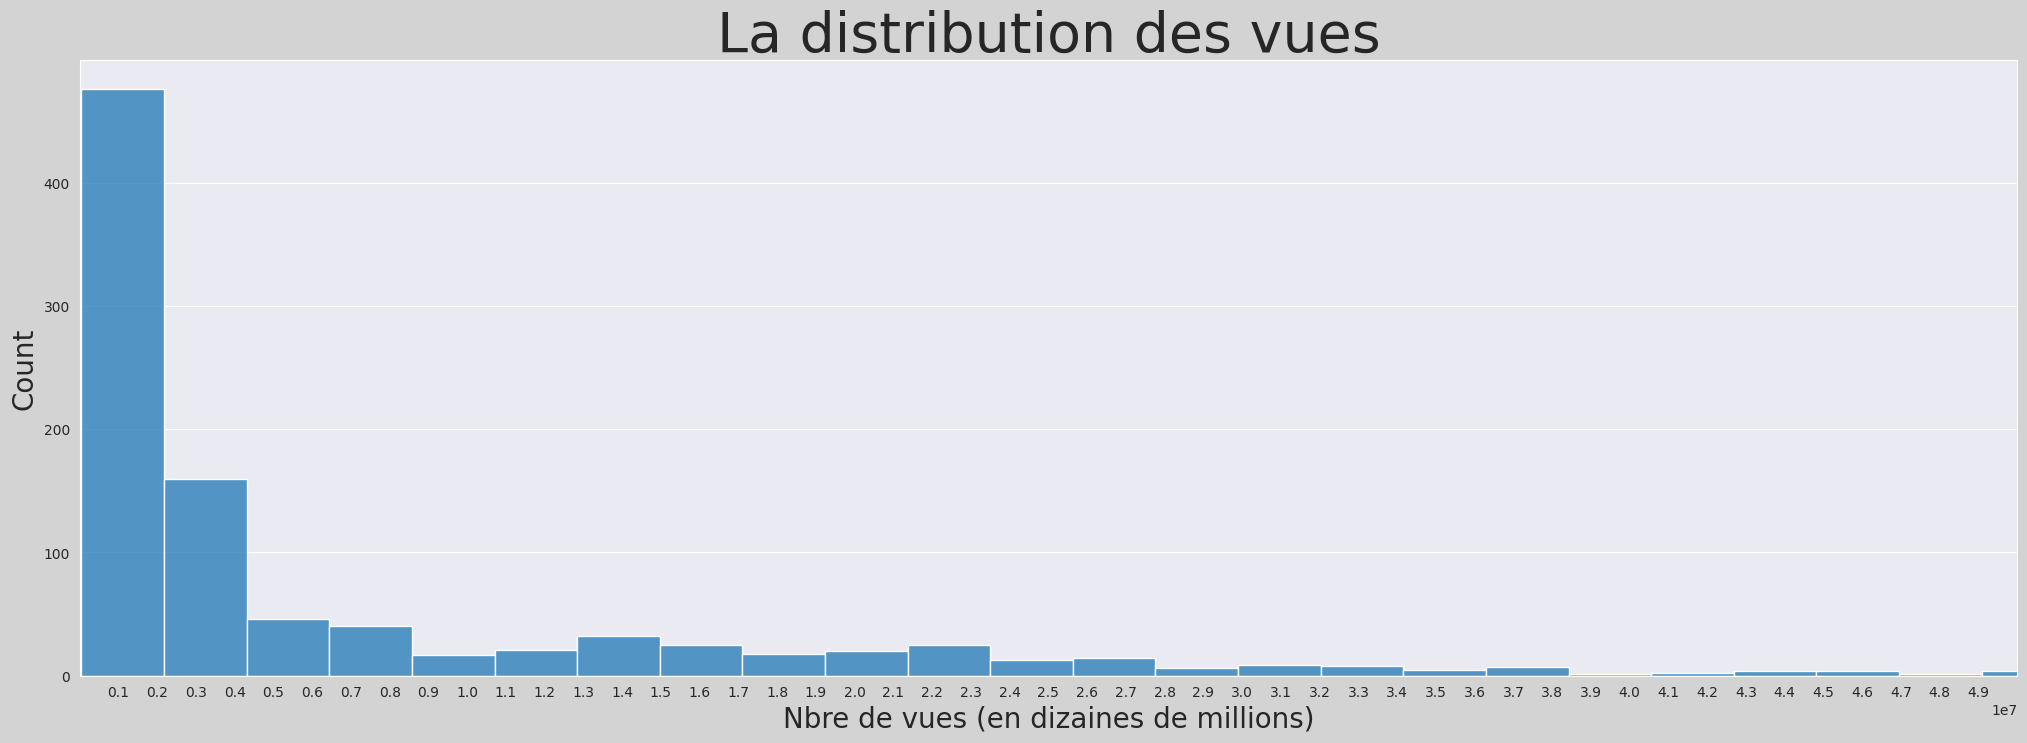

In [68]:
plt.figure(figsize=(25, 8), facecolor='lightgray')
plt.grid(axis="x")
plt.title("La distribution des vues", fontsize=40)
plt.xlabel("Nbre de vues (en dizaines de millions)", fontsize=20)
plt.ylabel("", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
liste = np.arange(1e6, 50e6, 1e6)
plt.xlim(0, 50e6)
plt.xticks(liste)
sns.histplot(data['video_views'])
plt.show()

<strong>Graphique en barres des 10 vidéos les plus populaires</strong>

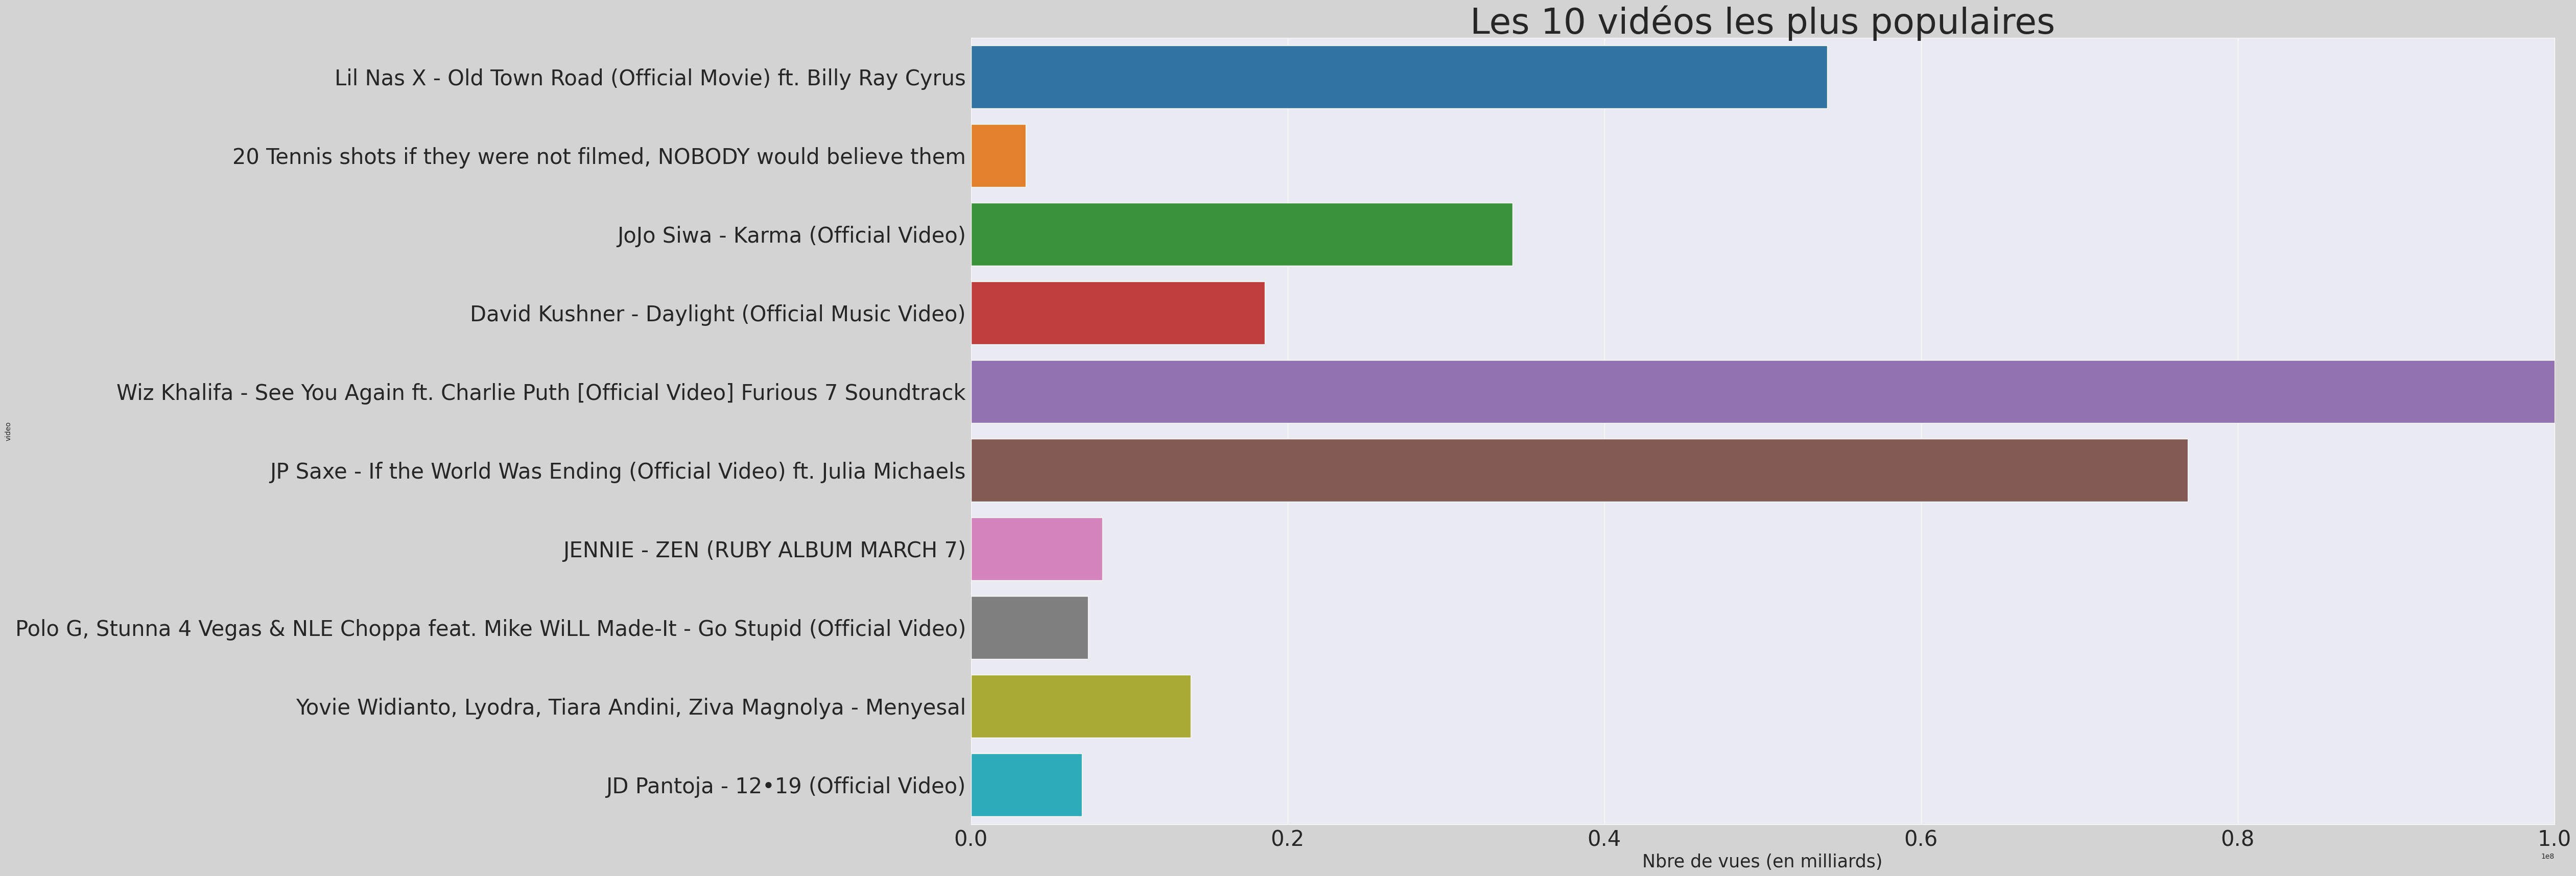

In [69]:
plt.figure(figsize=(40, 20), facecolor='lightgray')
plt.grid(axis="y")
plt.title("Les 10 vidéos les plus populaires", fontsize=50)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.xlim(0, 100e6)
plt.xlabel("Nbre de vues (en milliards)", fontsize=25)
sns.barplot(data=data.iloc[:10, ], x='video_views', y='video', hue='video', palette='tab10')
plt.show()

<strong>Boxplot du nombre de vues par catégorie</strong>

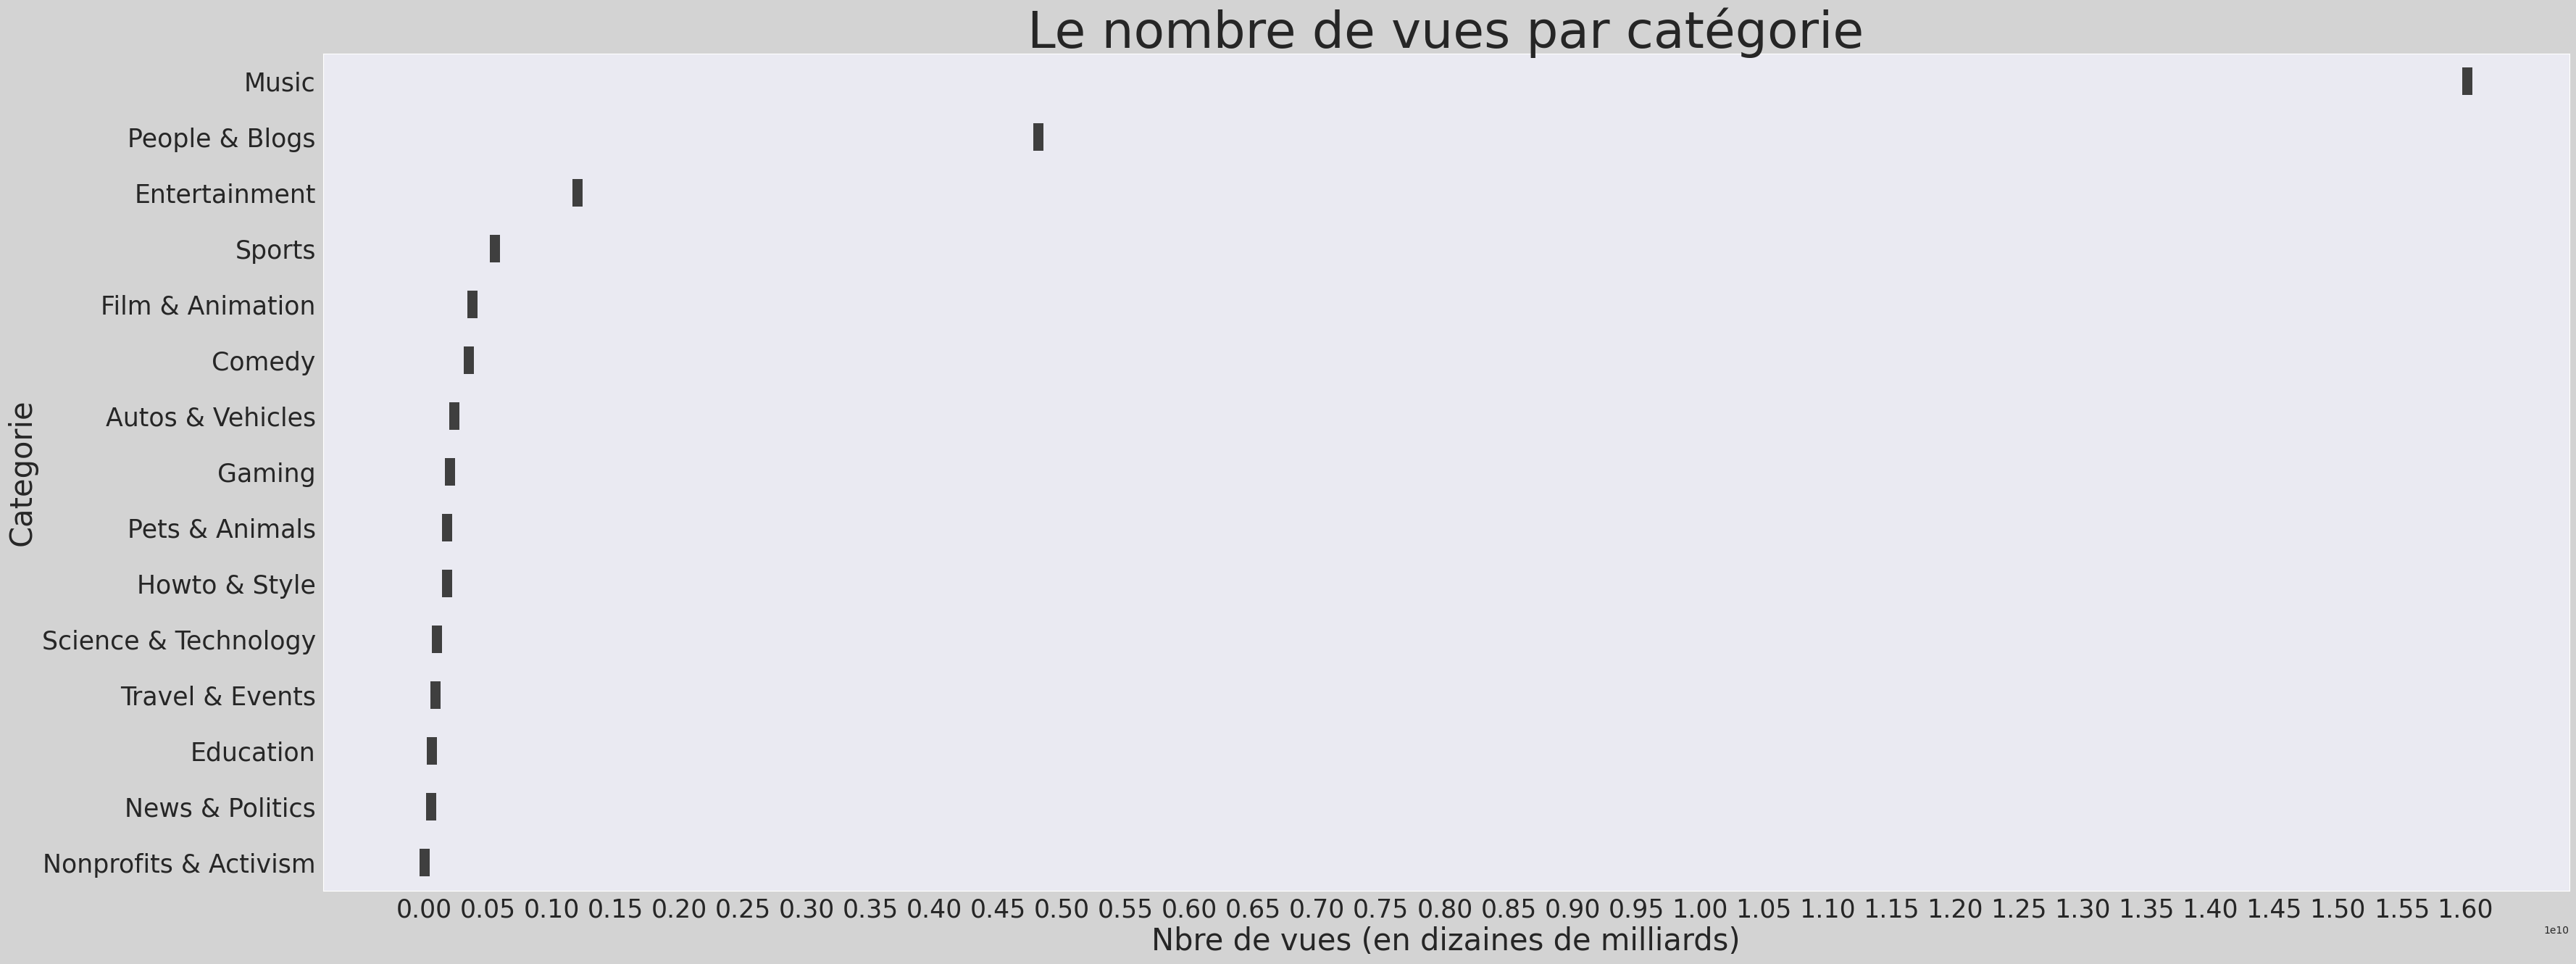

In [70]:
plt.figure(figsize=(40, 15), facecolor='lightgray')
plt.grid(axis='x')
plt.title("Le nombre de vues par catégorie", fontsize=50)
plt.xlabel("Nbre de vues (en dizaines de milliards)", fontsize=30)
plt.ylabel("Categorie", fontsize=30)
liste = np.arange(0, 16.1e9, 500e6)
plt.yticks(fontsize=25)
plt.xticks(liste, fontsize=25)
sns.boxplot(data=views_by_category_sorted, x='video_views', y='category', linewidth=10, width=0.5)
plt.show()

<strong>Scatterplot montrant la relation entre le nombre de vues et le nombre de likes</strong>

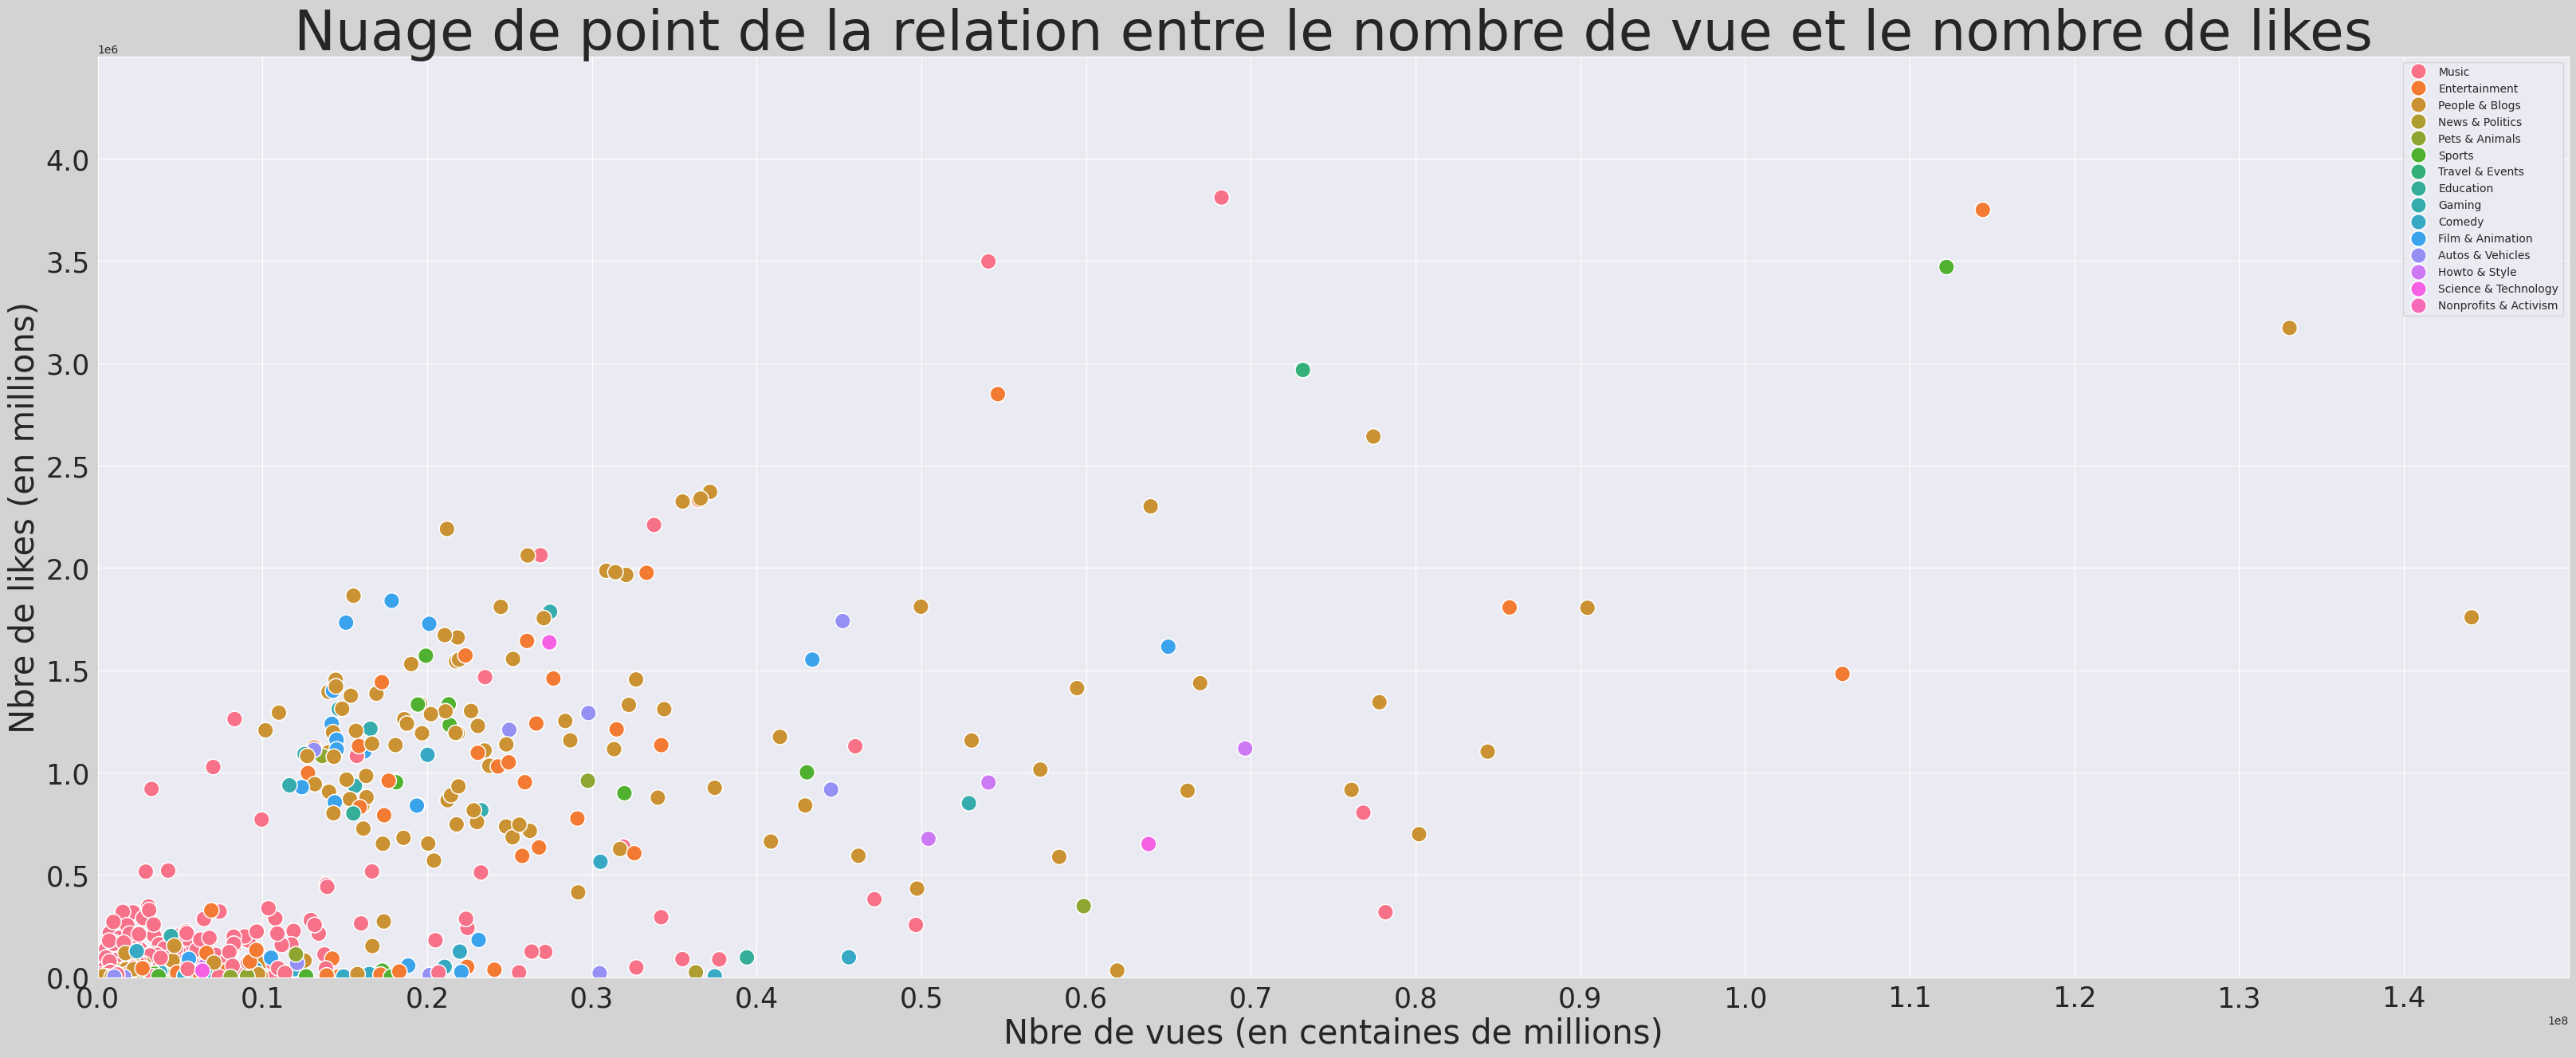

In [71]:
plt.figure(figsize=(40, 15), facecolor='lightgray')
plt.title("Nuage de point de la relation entre le nombre de vue et le nombre de likes", fontsize=50)
plt.xlabel("Nbre de vues (en centaines de millions)", fontsize=30)
plt.ylabel("Nbre de likes (en millions)", fontsize=30)
listeX = np.arange(0, 0.15e9, 10e6)
listeY = np.arange(0, 4.5e6, 0.5e6)
plt.xticks(listeX, fontsize=25)
plt.yticks(listeY, fontsize=25)
plt.xlim(0, 0.15e9)
plt.ylim(0, 4.5e6)
sns.scatterplot(data=data, x=data['video_views'], y=data['likes'], s=200, hue='category')
plt.legend()
plt.show()

<strong>Graphique en barres du nombre de vidéos populaires par année de publication</strong>

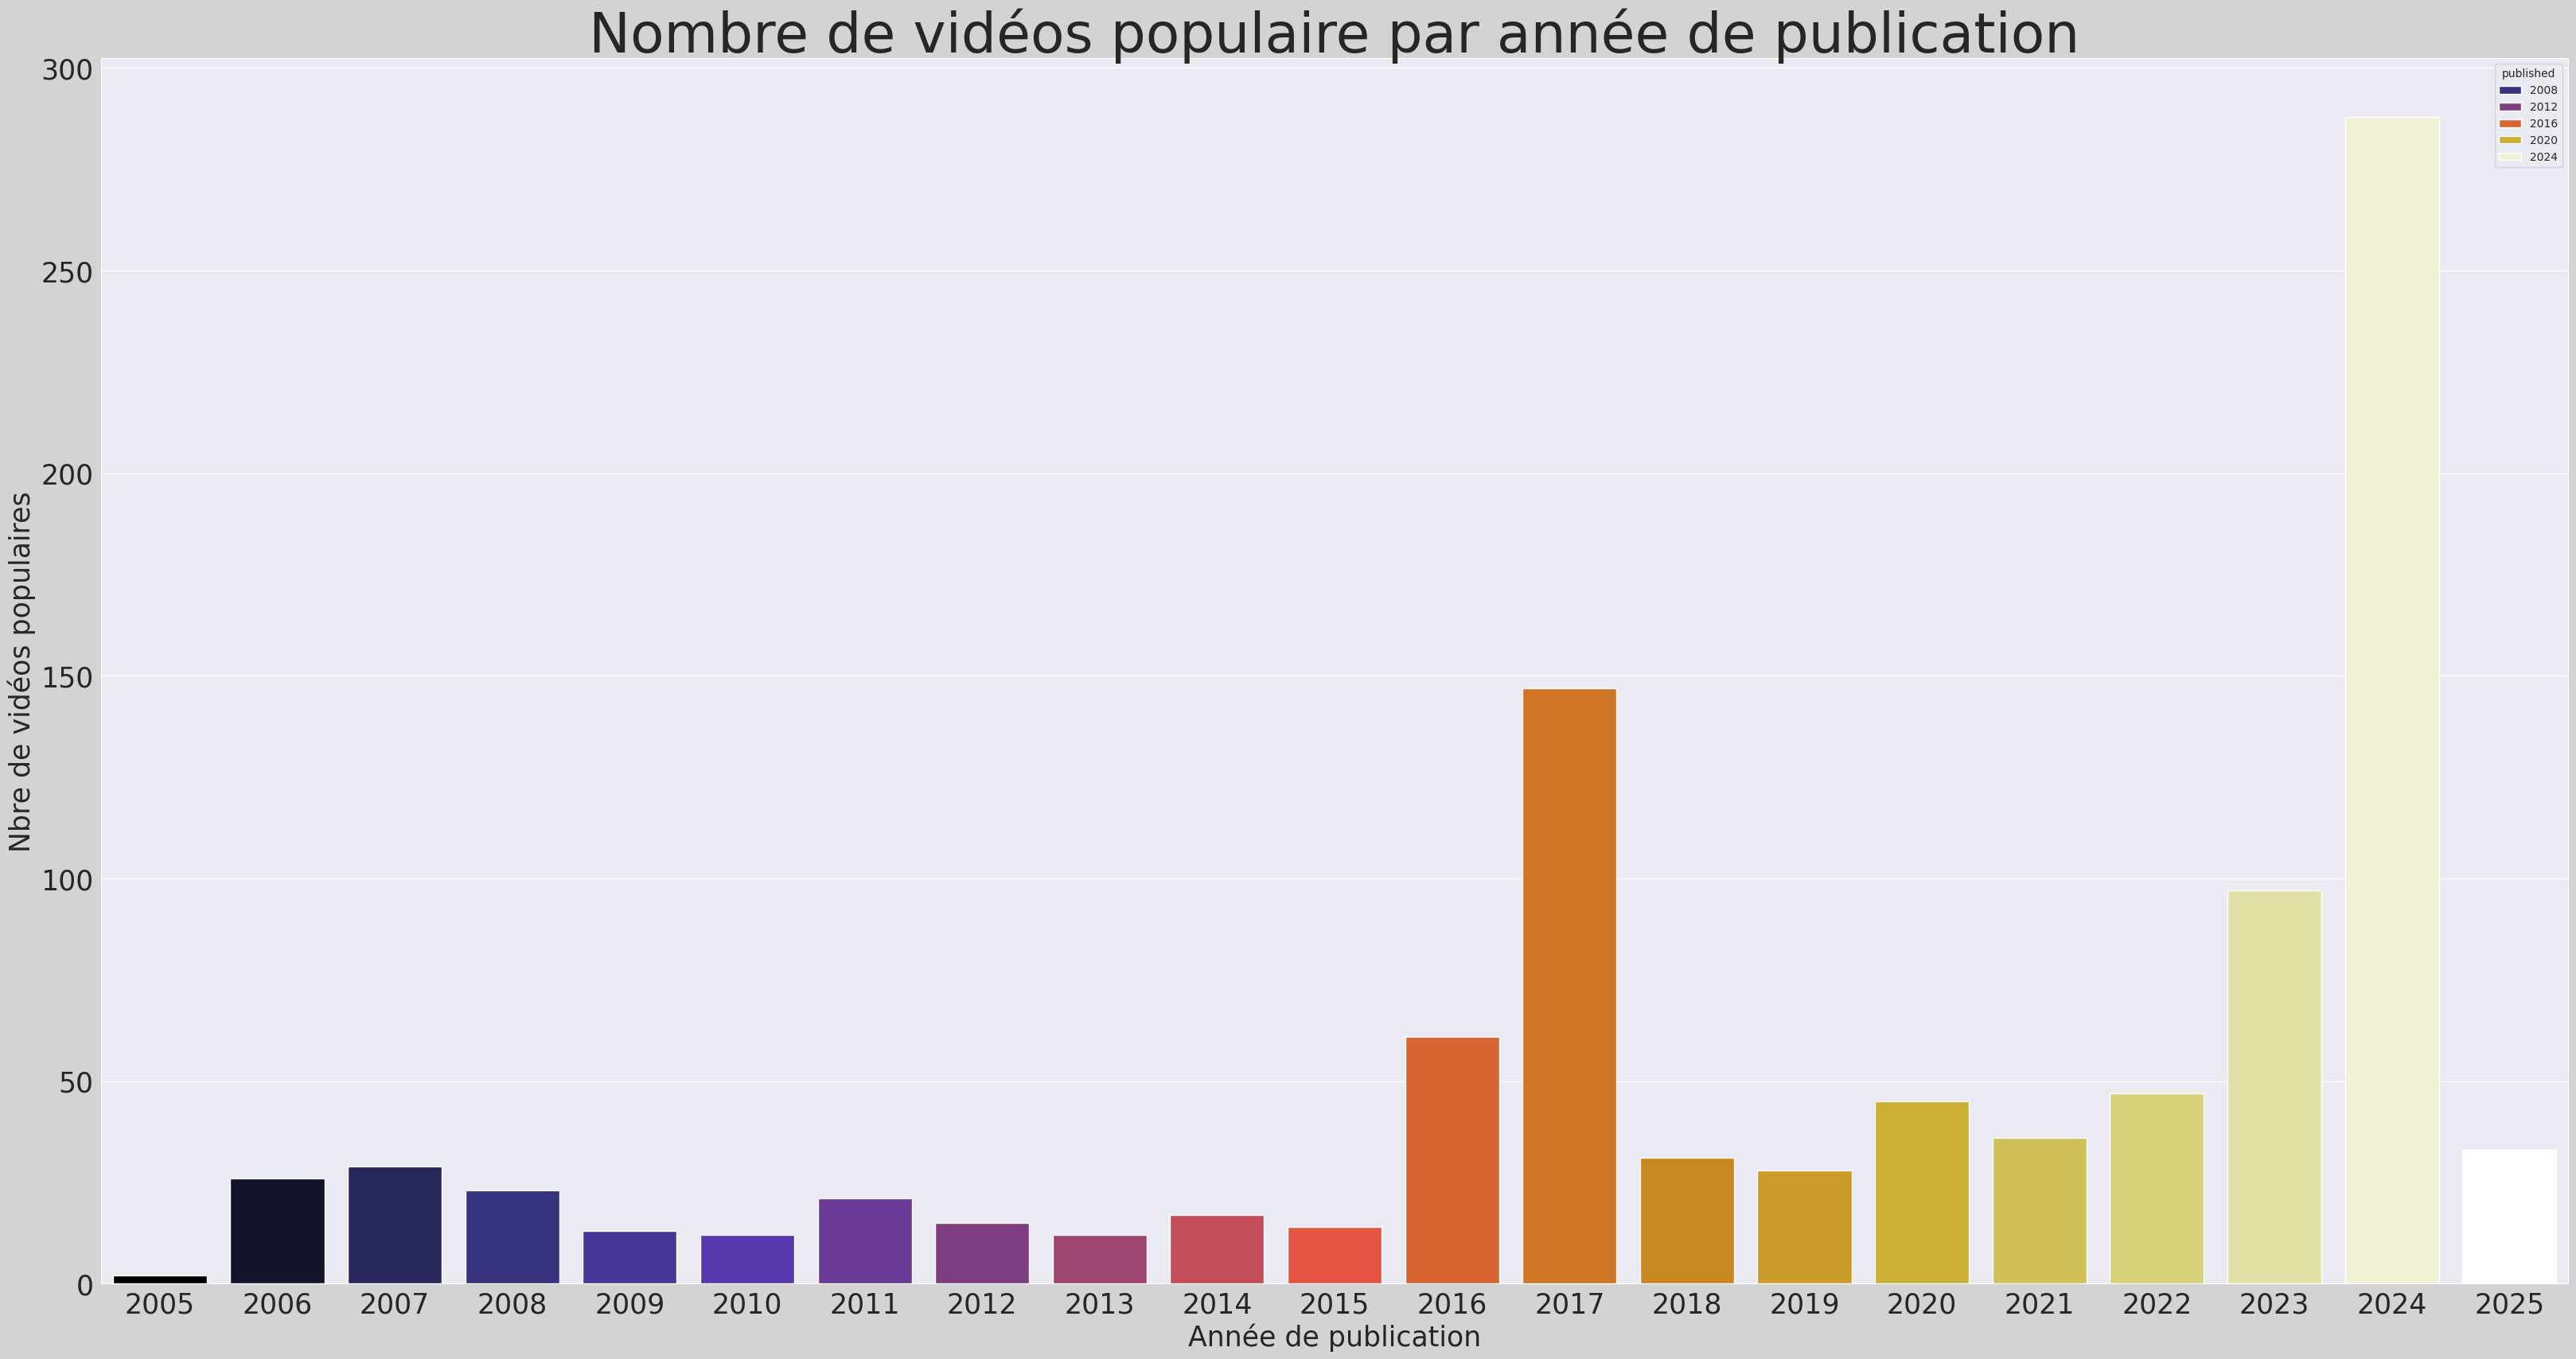

In [75]:
plt.figure(figsize=(40, 20), facecolor='lightgray')
plt.grid(axis="x")
plt.title("Nombre de vidéos populaire par année de publication", fontsize=50)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel("Année de publication", fontsize=25)
plt.ylabel("Nbre de vidéos populaires", fontsize=25)
sns.barplot(data=years_by_views_sorted, x='published', y='video_views', hue='published', palette='CMRmap')
plt.show()

<strong>Corrélation entre les likes et les nombres de vues</strong>

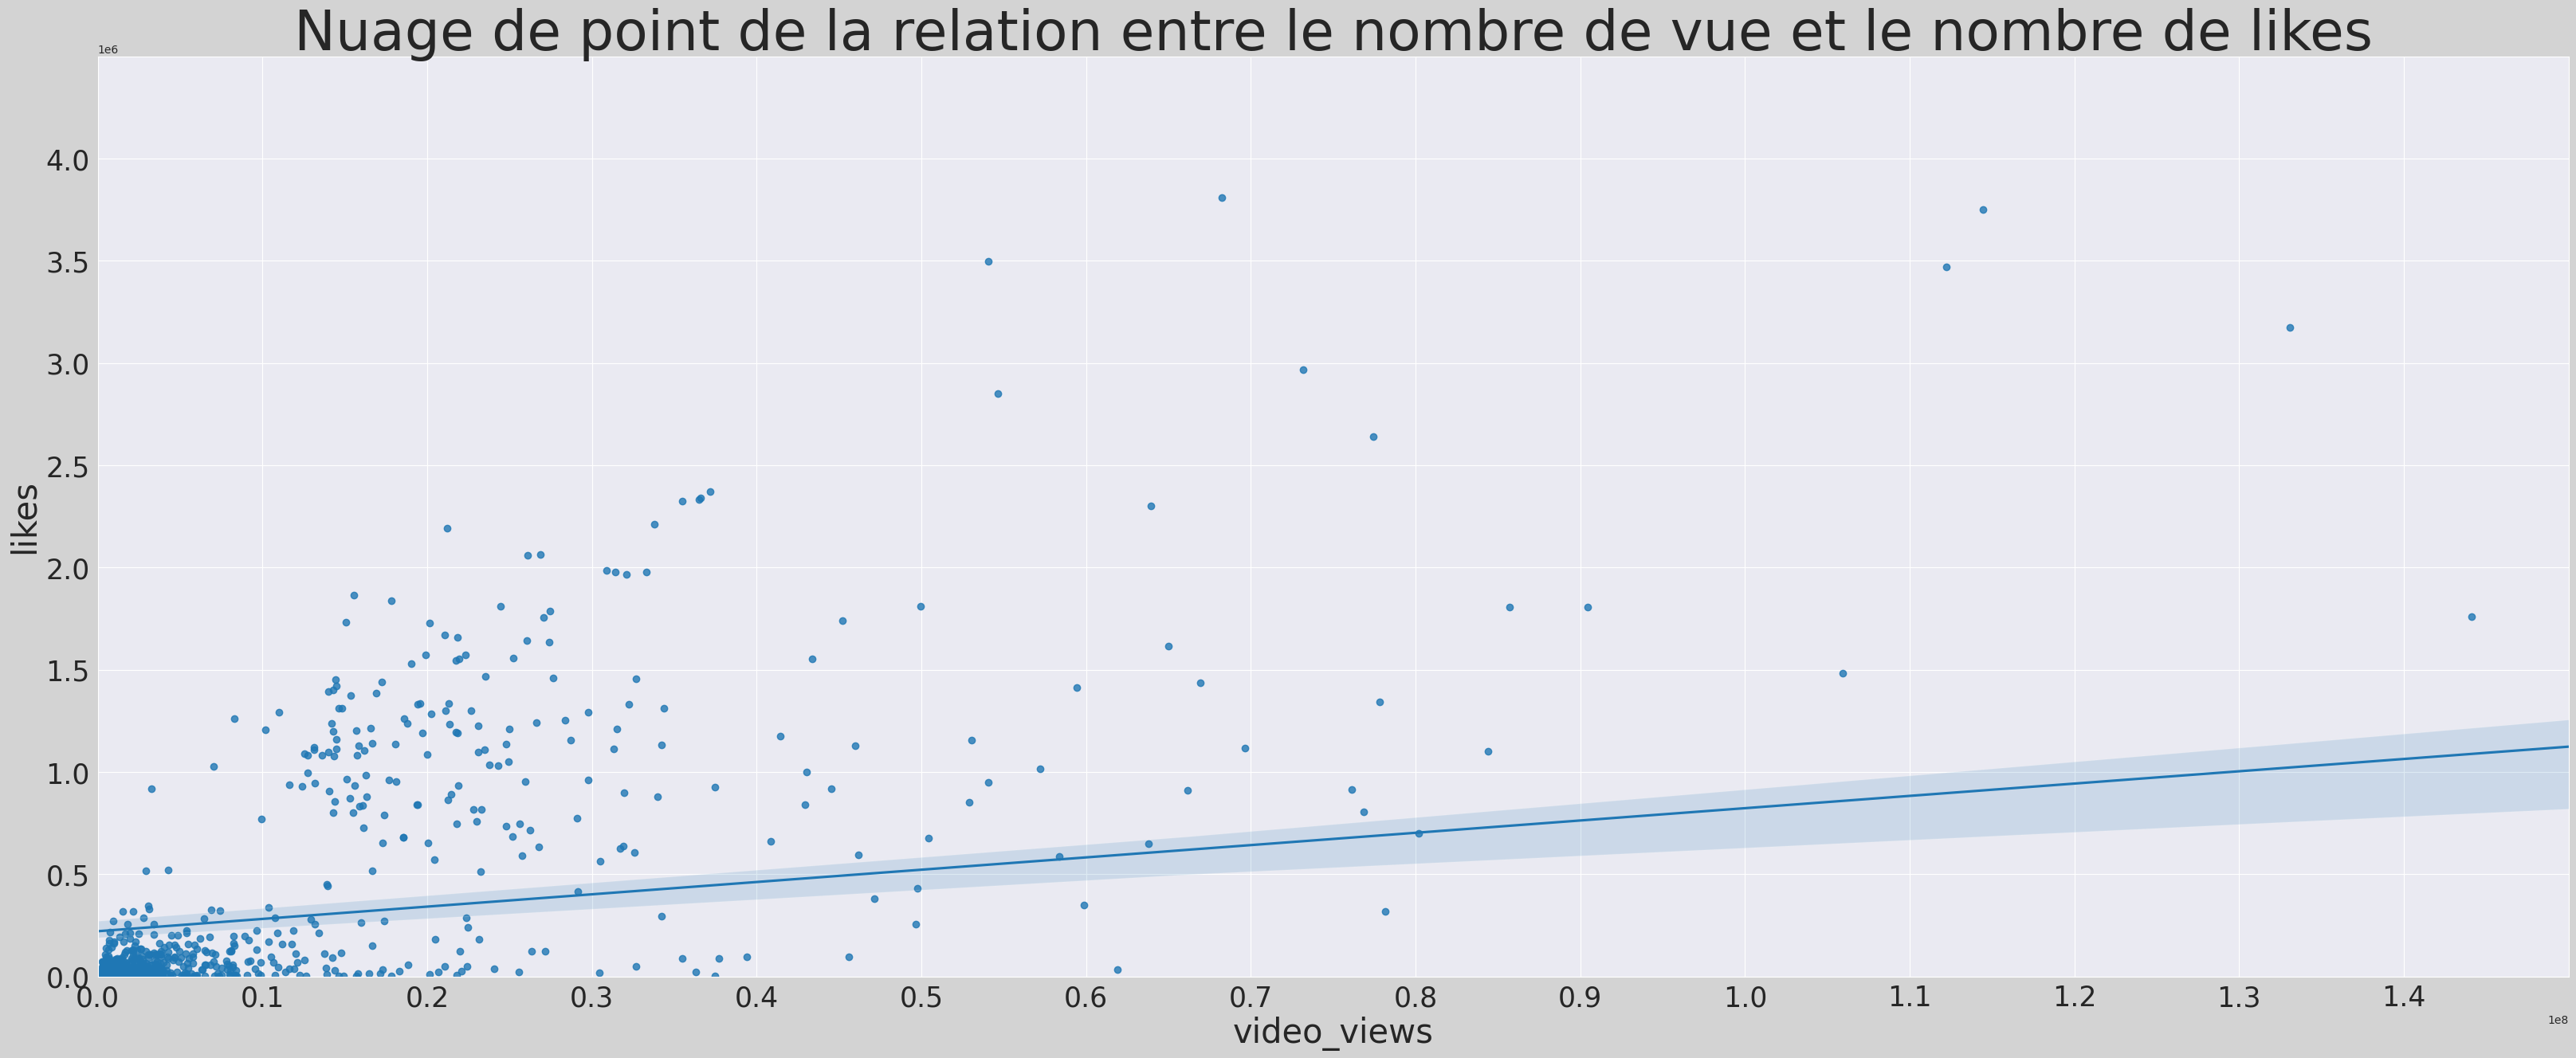

In [73]:
plt.figure(figsize=(40, 15), facecolor='lightgray')
plt.title("Nuage de point de la relation entre le nombre de vue et le nombre de likes", fontsize=50)
plt.xlabel("Nbre de vues (en centaines de millions)", fontsize=30)
plt.ylabel("Nbre de likes (en millions)", fontsize=30)
listeX = np.arange(0, 0.15e9, 10e6)
listeY = np.arange(0, 4.5e6, 0.5e6)
plt.xticks(listeX, fontsize=25)
plt.yticks(listeY, fontsize=25)
plt.xlim(0, 0.15e9)
plt.ylim(0, 4.5e6)
sns.regplot(data=data, x=data['video_views'], y=data['likes'])
plt.show()